In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity


In [86]:
# READING IMAGES FROM FOLDER
import glob
path = glob.glob("/home/mukesh/AI_learning_info/blink_Detection/images/*.jpg")

cv_img = []
for img in path:
    n = cv2.imread(img)
    cv_img.append(n)


In [87]:
#FACE DETECTION FUNCTION
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    for bounding_box in faces:

        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2]
        crop_face = cv2.resize(crop_face,(160,160))
        return crop_face

In [88]:
# FACE DETECTING FROM FOLDER IMAGE ONE BY ONE
all_detected=[]
for i in cv_img:
    face_dec2=face_detection(i)
    all_detected.append(face_dec2)
#    plot_img(face_dec2)


[[573.43  79.6  841.21 443.25]]
573 79 841 443
[[172.4  166.45 430.25 521.94]]
172 166 430 521
[[208.63 190.35 452.76 478.56]]
208 190 452 478
[[ 81.29  23.89 149.9  115.78]]
81 23 149 115
[[134.96  62.3  205.81 157.01]]
134 62 205 157


[[134.96  62.3  205.81 157.01]]
134 62 205 157


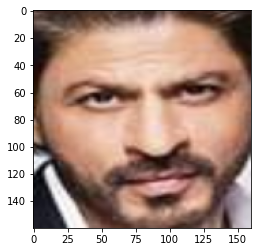

In [89]:
#SINGLE IMAGE READING
img1=cv2.imread("/home/mukesh/AI_learning_info/blink_Detection/srk.jpg")

def plot_img(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
#plot_img(img1)

#FACE DETECTING OF SINGLE IMAGE
face_dec1=face_detection(img1)
plot_img(face_dec1)

In [90]:
embedder=FaceNet()

In [91]:
#EMBEDDING FOR SINGLE IMAGE
embedding1=embedder.embeddings(np.expand_dims(face_dec1,axis=0))

#EMBEDDING FOR FOLDER IMAGE
all_embeddings=[]
for j in all_detected:
    embedding2=embedder.embeddings(np.expand_dims(j,axis=0))
    all_embeddings.append(embedding2)


1/1 [==============================] - 0s 282ms/step


In [92]:
#FINDING COSINE SIMILARITY WITH SINGLE IMAGE TO FOLDER IMAGE
score=[]
for k in all_embeddings:
    similarity_score=cosine_similarity(embedding1,k)
    score.append(similarity_score)
print(score)  

[array([[0.38704395]], dtype=float32), array([[0.19856974]], dtype=float32), array([[0.09086396]], dtype=float32), array([[0.72959423]], dtype=float32), array([[1.]], dtype=float32)]


In [93]:

#CHECKING SIMILARITY SCORE GREATER THAN 0.7
def check(lists,val):
    for x in lists:
        if x>=val:
            print("The similarity score greater than 0.7 is: ",x)
            print("face matched")
    return check

check(score,0.7)

The similarity score greater than 0.7 is:  [[0.72959423]]
face matched
The similarity score greater than 0.7 is:  [[1.]]
face matched


<function __main__.check(lists, val)>